In [ ]:
#Description : This program attempts to optimize a users portfolio using the effecient frontier

In [ ]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock symbols/tickers in the portfolios
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [ ]:
# Assign weights to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# Get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [ ]:
# Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-02-05'

In [ ]:
# Create a dataframe to store the adjusted close price of stocks
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [ ]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.065252,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.849854,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.380499,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.284145,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.327972,13.880000,365.280823
...,...,...,...,...,...
2021-01-29,258.329987,3206.199951,131.960007,532.390015,1835.739990
2021-02-01,262.010010,3342.879883,134.139999,539.039978,1901.349976
2021-02-02,267.079987,3380.000000,134.990005,548.159973,1927.510010


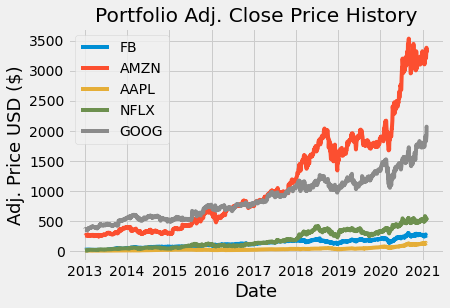

In [ ]:
# Visually sho the stock / portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [ ]:
#  Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-01-29,-0.025170,-0.009705,-0.037421,-0.011530,-0.014690
2021-02-01,0.014245,0.042630,0.016520,0.012491,0.035740
2021-02-02,0.019350,0.011104,0.006337,0.016919,0.013759


In [ ]:
#Create and show annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118763,0.055221,0.045245,0.057225,0.050698
AMZN,0.055221,0.094043,0.040175,0.064331,0.047894
AAPL,0.045245,0.040175,0.082253,0.035748,0.038690
NFLX,0.057225,0.064331,0.035748,0.213508,0.049730
GOOG,0.050698,0.047894,0.038690,0.049730,0.067089


In [ ]:
#Calculate the portfolio variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06182272110274755

In [ ]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2486417525331326

In [ ]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.36314733718891795

In [ ]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round (port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 )+ '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual voloatility / risk: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 36.0%
Annual voloatility / risk: 25.0%
Annual variance: 6.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 5.0MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.05402), ('AMZN', 0.31164), ('AAPL', 0.2944), ('NFLX', 0.33994), ('GOOG', 0.0)])
Expected annual return: 42.0%
Annual volatility: 27.4%
Sharpe Ratio: 1.46


(0.42003820339757125, 0.2735676141915161, 1.46230102777267)

In [ ]:
0.05402 + 0.31164 + 0.2944 + 0.33994

1.0

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))


Discrete allocation: {'FB': 4, 'AMZN': 1, 'AAPL': 33, 'NFLX': 10}
Funds remaining: $547.57
